In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10
import numpy as np
import glob
from scipy import stats

In [2]:
#cd -

In [3]:
cd CSVs

/Users/patrickbovard/Documents/GitHubRepos/mta-project-1/CSVs


#### Load Data

In [4]:
extension = 'txt'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
data = pd.concat([pd.read_csv(f) for f in all_filenames ])
data.sort_values('DATE').head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,00:00:00,REGULAR,6999064,2373568
84199,N333,R141,01-00-01,FOREST HILLS 71,EFMR,IND,03/30/2019,21:00:00,REGULAR,437078,139110
84236,N333,R141,01-00-02,FOREST HILLS 71,EFMR,IND,03/30/2019,01:00:00,REGULAR,17793524,17841536
84237,N333,R141,01-00-02,FOREST HILLS 71,EFMR,IND,03/30/2019,05:00:00,REGULAR,17793530,17841552
84238,N333,R141,01-00-02,FOREST HILLS 71,EFMR,IND,03/30/2019,09:00:00,REGULAR,17793551,17841566


### Clean Data

remove spaces from column names

In [5]:
data.columns = data.columns.str.replace(' ', '')

add Date_Time column 

In [6]:
data['Date_Time'] = pd.to_datetime(data['DATE'], cache=True) + pd.to_timedelta(data['TIME'])

Add Turnstile (Combining SCP,C/A, Station and Unit) and Weekday column

In [7]:
data['Turnstile'] = data['C/A'] + data['UNIT'] + data['SCP'] + data['STATION']
data['DATE'] = pd.to_datetime(data['DATE'], cache=True)
data['Week_Day'] = data['DATE'].dt.day_name()

Only look at regular data

In [8]:
data = data[data.DESC == 'REGULAR']
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstile,Week_Day
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-05-11,00:00:00,REGULAR,7053483,2390505,2019-05-11 00:00:00,A002R05102-00-0059 ST,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-05-11,04:00:00,REGULAR,7053511,2390508,2019-05-11 04:00:00,A002R05102-00-0059 ST,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-05-11,08:00:00,REGULAR,7053534,2390536,2019-05-11 08:00:00,A002R05102-00-0059 ST,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-05-11,12:00:00,REGULAR,7053618,2390596,2019-05-11 12:00:00,A002R05102-00-0059 ST,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-05-11,16:00:00,REGULAR,7053841,2390655,2019-05-11 16:00:00,A002R05102-00-0059 ST,Saturday


Below was commented out on main project notebook:

In [9]:
#grouped_day = data.groupby(['STATION','DATE'], as_index=False).agg({'ENTRIES': ['min', 'max'], 'EXITS': ['min', 'max']})
#grouped_day.columns = [ 'Station','Date', 'ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX']

In [10]:
#grouped_day['Date'] = pd.to_datetime(grouped_day['Date'], cache=True)
#grouped_day['Week_Day'] = grouped_day['Date'].dt.day_name()

In [11]:
#grouped_day['Total_Entries'] = grouped_day['ENTRIES_MAX'] - grouped_day['ENTRIES_MIN']
#grouped_day['Total_Exits'] = grouped_day['EXITS_MAX'] - grouped_day['EXITS_MIN']
#grouped_day['Total_Traffic'] = grouped_day['Total_Exits'] + grouped_day['Total_Exits']
#grouped_day.head()

In [12]:
#grouped_day.drop(['ENTRIES_MIN','ENTRIES_MAX','EXITS_MIN','EXITS_MAX', 'Total_Entries', 'Total_Exits', ], axis=1)

#grouped_day = grouped_day[(np.abs(stats.zscore(grouped_day['Total_Traffic'])) < 3)] #filtering

#### Find total traffic

Add shifted columns to show previous entries and exits

In [13]:
#All turnstiles have cumulative counts, previous data needs to be subtraced from current data 
#to find total entries/exits
grouped_time=data.copy()
grouped_time["PREV_TIME"] = data.groupby(["Turnstile"]).TIME.shift(1)
grouped_time["PREV_EXITS"] = data.groupby(["Turnstile"]).EXITS.shift(1)
grouped_time["PREV_ENTRIES"] = data.groupby(["Turnstile"]).ENTRIES.shift(1)
grouped_time.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstile,Week_Day,PREV_TIME,PREV_EXITS,PREV_ENTRIES
206852,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-03,05:00:00,REGULAR,5554,376,2019-05-03 05:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,Friday,01:00:00,376.0,5554.0
206853,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-03,09:00:00,REGULAR,5554,376,2019-05-03 09:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,Friday,05:00:00,376.0,5554.0
206854,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-03,13:00:00,REGULAR,5554,376,2019-05-03 13:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,Friday,09:00:00,376.0,5554.0
206855,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-03,17:00:00,REGULAR,5554,376,2019-05-03 17:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,Friday,13:00:00,376.0,5554.0
206856,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-03,21:00:00,REGULAR,5554,376,2019-05-03 21:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,Friday,17:00:00,376.0,5554.0


In [14]:
#drop first row of each turnstile b/c of shift down
grouped_time.dropna(subset=["PREV_ENTRIES"], axis=0, inplace=True) 
grouped_time.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstile,Week_Day,PREV_TIME,PREV_EXITS,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-05-11,04:00:00,REGULAR,7053511,2390508,2019-05-11 04:00:00,A002R05102-00-0059 ST,Saturday,00:00:00,2390505.0,7053483.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-05-11,08:00:00,REGULAR,7053534,2390536,2019-05-11 08:00:00,A002R05102-00-0059 ST,Saturday,04:00:00,2390508.0,7053511.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-05-11,12:00:00,REGULAR,7053618,2390596,2019-05-11 12:00:00,A002R05102-00-0059 ST,Saturday,08:00:00,2390536.0,7053534.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-05-11,16:00:00,REGULAR,7053841,2390655,2019-05-11 16:00:00,A002R05102-00-0059 ST,Saturday,12:00:00,2390596.0,7053618.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-05-11,20:00:00,REGULAR,7054133,2390702,2019-05-11 20:00:00,A002R05102-00-0059 ST,Saturday,16:00:00,2390655.0,7053841.0


Remove counter errors from total entries/exits that occur from counters resetting

In [15]:
def get_daily_counts_exits(row, max_counter):
    counter_ex = row["EXITS"] - row["PREV_EXITS"]
    if counter_ex < 0:
        # Maybe counter is reversed?
        counter_ex = -counter_ex
    if counter_ex > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter_ex > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter_ex

def get_daily_counts_entries(row, max_counter):
    counter_ent = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter_ent < 0:
        # Maybe counter is reversed?
        counter_ent = -counter_ent
    if counter_ent > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter_ent > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter_ent


# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!

In [16]:
grouped_time["TOTAL_ENTRIES"] = grouped_time.apply(get_daily_counts_entries, axis=1, max_counter=100000)
grouped_time["TOTAL_EXITS"] = grouped_time.apply(get_daily_counts_exits, axis=1, max_counter=100000)
grouped_time.describe()

,ENTRIES,EXITS,PREV_EXITS,PREV_ENTRIES,TOTAL_ENTRIES,TOTAL_EXITS
count,2.236073e+06,2.236073e+06,2.236073e+06,2.236073e+06,2.236073e+06,2.236073e+06
mean,4.148039e+07,3.396750e+07,3.396821e+07,4.148122e+07,6.042812e+02,4.839396e+02
std,2.118498e+08,1.951475e+08,1.951484e+08,2.118507e+08,4.671125e+03,3.973023e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.499730e+05,1.430240e+05,1.430260e+05,3.499680e+05,1.000000e+01,8.000000e+00
50%,2.176565e+06,1.254667e+06,1.254664e+06,2.176577e+06,7.600000e+01,5.400000e+01
75%,6.780894e+06,4.604451e+06,4.604462e+06,6.780916e+06,2.520000e+02,1.760000e+02
max,2.129395e+09,2.124196e+09,2.124196e+09,2.129395e+09,9.997500e+04,9.999600e+04


In [17]:
#Find Total Traffic
grouped_time["TOTAL_TRAFFIC"] = grouped_time["TOTAL_EXITS"] + grouped_time["TOTAL_ENTRIES"]
grouped_time.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstile,Week_Day,PREV_TIME,PREV_EXITS,PREV_ENTRIES,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-05-11,04:00:00,REGULAR,7053511,2390508,2019-05-11 04:00:00,A002R05102-00-0059 ST,Saturday,00:00:00,2390505.0,7053483.0,28.0,3.0,31.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-05-11,08:00:00,REGULAR,7053534,2390536,2019-05-11 08:00:00,A002R05102-00-0059 ST,Saturday,04:00:00,2390508.0,7053511.0,23.0,28.0,51.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-05-11,12:00:00,REGULAR,7053618,2390596,2019-05-11 12:00:00,A002R05102-00-0059 ST,Saturday,08:00:00,2390536.0,7053534.0,84.0,60.0,144.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-05-11,16:00:00,REGULAR,7053841,2390655,2019-05-11 16:00:00,A002R05102-00-0059 ST,Saturday,12:00:00,2390596.0,7053618.0,223.0,59.0,282.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-05-11,20:00:00,REGULAR,7054133,2390702,2019-05-11 20:00:00,A002R05102-00-0059 ST,Saturday,16:00:00,2390655.0,7053841.0,292.0,47.0,339.0


remove total traffic outliers that are 3 sigmas from mean

In [18]:
grouped_time = grouped_time[(np.abs(stats.zscore(grouped_time['TOTAL_TRAFFIC'])) < 3)] 
#filtering
grouped_time.describe()

,ENTRIES,EXITS,PREV_EXITS,PREV_ENTRIES,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC
count,2.212501e+06,2.212501e+06,2.212501e+06,2.212501e+06,2.212501e+06,2.212501e+06,2.212501e+06
mean,4.145377e+07,3.392555e+07,3.392618e+07,4.145496e+07,2.097961e+02,1.654674e+02,3.752635e+02
std,2.117279e+08,1.950042e+08,1.950051e+08,2.117302e+08,6.732978e+02,5.741347e+02,1.067306e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.458680e+05,1.405340e+05,1.404810e+05,3.457220e+05,1.000000e+01,8.000000e+00,2.900000e+01
50%,2.165853e+06,1.246274e+06,1.246272e+06,2.165687e+06,7.400000e+01,5.300000e+01,1.740000e+02
75%,6.770890e+06,4.591110e+06,4.591031e+06,6.770733e+06,2.440000e+02,1.700000e+02,4.640000e+02
max,2.129395e+09,2.124196e+09,2.124196e+09,2.129395e+09,2.454400e+04,2.449100e+04,2.454400e+04


drop uneeded columns

In [19]:
grouped_time.drop(['C/A','UNIT','SCP','LINENAME', 'ENTRIES', 'EXITS', 'PREV_TIME', 'PREV_ENTRIES', 'PREV_EXITS'], axis=1, inplace=True)

In [20]:
#grouped_day = data.groupby(['DATE','Turnstile','STATION'], as_index=False).agg({'ENTRIES': ['min', 'max'], 'EXITS': ['min', 'max']})
#grouped = data.groupby(['STATION','DATE']).agg({'ENTRIES': ['min', 'max'], 'EXITS': ['min', 'max']})
#grouped = grouped.set_index('STATION')
#grouped.head()

In [21]:
#grouped_day.head()

In [22]:
#grouped.columns = [ 'Station', 'Date', 'ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX']
#grouped_day.columns = [ 'Date', 'Turnstile', 'Station','ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX']
#grouped.columns = ['ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX']
#grouped.dtypes

Find total entries exits, and traffic

In [23]:
#grouped_day['Total_Entries'] = grouped_day['ENTRIES_MAX'] - grouped_day['ENTRIES_MIN']
#grouped_day['Total_Exits'] = grouped_day['EXITS_MAX'] - grouped_day['EXITS_MIN']
#grouped_day['Total_Traffic'] = grouped_day['Total_Exits'] + grouped_day['Total_Entries']
#grouped_day.head()

In [24]:
#grouped_day.drop(['ENTRIES_MIN','ENTRIES_MAX','EXITS_MIN','EXITS_MAX', 'Total_Entries', 'Total_Exits', ], axis=1)



Removing Outlier data from Total_traffic column (Removing anything outside 3 sigma)

In [25]:
#grouped_day = grouped_day[(np.abs(stats.zscore(grouped_day['Total_Traffic'])) < 3)] #filtering

In [26]:
#grouped_time[grouped_time["ENTRIES"] < grouped_time["PREV_ENTRIES"]].head()

In [27]:
#grouped_time = data.sort_values(['Date_Time']).groupby(['Turnstile','STATION','DIVISION','Date_Time'],as_index = False).agg({'ENTRIES': ['diff'], 'EXITS': ['diff']})

In [28]:
#grouped_time = data
#grouped_time.sort_values(['Turnstile','Date_Time'],inplace = True)
#grouped_time.head(5)
#entry_vals = grouped_time['ENTRIES'].values
#exit_vals = grouped_time['EXITS'].values
#len(entry)
#len (entry_vals[:-1])
#len (entry_vals[1:])
#diffs_entry = entry_vals[1:] - entry_vals[:-1]
#diffs_exit = exit_vals[1:] - exit_vals[:-1]
#diffs_entry = np.append(diffs_entry,0)
#diffs_exit = np.append(diffs_exit,0)
#grouped_time['diffs_entry'] = grouped_time.groupby(['Turnstile'])['ENTRIES'].diff()
#grouped_time['diffs_exit'] = grouped_time.groupby(['Turnstile'])['EXITS'].diff()
#mask = !((grouped_time['diffs_entry'] == 0) && (grouped_time['diffs_exit'] == 0))
#mask =   grouped_time['diffs_entry'] == 0
#grouped_time = grouped_time[grouped_time['diffs_entry'] ]
#grouped_time['diffs_entry'] = grouped_time.rolling_apply(data['ENTRIES'], 2, lambda x: x[1] - x[0])
#grouped_time['diffs_exit'] = grouped_time.rolling_apply(data['EXITS'], 2, lambda x: x[1] - x[0])
#grouped_time.head()
#mask
#grouped_time.head()

In [29]:
#entry_vals = grouped_time['ENTRIES'].values
#entry_vals[1:]

In [30]:
#grouped_time = data.groupby(['STATION','TIME'], as_index=False).agg({'ENTRIES': ['diff'], 'EXITS': ['diff']})
#grouped_time.head()
#grouped_time.columns = ['Station', 'Time', 'ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX']


### Find high traffic areas for games

In [31]:
pwd

'/Users/patrickbovard/Documents/GitHubRepos/mta-project-1/CSVs'

In [32]:
cd - 

/Users/patrickbovard/Documents/GitHubRepos/mta-project-1


Changing directory to load in schedule data files:

In [33]:
cd Schedule Data

/Users/patrickbovard/Documents/GitHubRepos/mta-project-1/Schedule Data


### Reading in the 2019 MLB Schedule CSV data

In [34]:
schedule_2019 = pd.read_csv("2019SKED.TXT")

In [35]:
#scope out the data
schedule_2019.head()

,20190320,0,Wed,SEA,AL,1,OAK,AL.1,1.1,n,Unnamed: 10,Unnamed: 11
0,20190321,0,Thu,SEA,AL,2,OAK,AL,2,n,NaN,NaN
1,20190328,0,Thu,ANA,AL,1,OAK,AL,3,d,NaN,NaN
2,20190328,0,Thu,ARI,NL,1,LAN,NL,1,d,NaN,NaN
3,20190328,0,Thu,ATL,NL,1,PHI,NL,1,d,NaN,NaN
4,20190328,0,Thu,BAL,AL,1,NYA,AL,1,d,NaN,NaN


Columns are the first row, need to rename based on the site definitions:

In [36]:
schedule_2019.columns=['Date','GameNumber','WeekDay','VisitingTeam','VisitingTeamLeague','VisitingTeamGame','HomeTeam','HomeTeamLeague','HomeTeamGame','GameTime','CancelIndicator','MakeUpDate']
schedule_2019.head()

,Date,GameNumber,WeekDay,VisitingTeam,VisitingTeamLeague,VisitingTeamGame,HomeTeam,HomeTeamLeague,HomeTeamGame,GameTime,CancelIndicator,MakeUpDate
0,20190321,0,Thu,SEA,AL,2,OAK,AL,2,n,NaN,NaN
1,20190328,0,Thu,ANA,AL,1,OAK,AL,3,d,NaN,NaN
2,20190328,0,Thu,ARI,NL,1,LAN,NL,1,d,NaN,NaN
3,20190328,0,Thu,ATL,NL,1,PHI,NL,1,d,NaN,NaN
4,20190328,0,Thu,BAL,AL,1,NYA,AL,1,d,NaN,NaN


In [37]:
#adding a DateTime element to the schedule data to match with the subway data
schedule_2019['DateTime'] = pd.to_datetime(schedule_2019.Date, format='%Y%m%d')

#Pulling the team abbreviations, each should have about 81 home games, depending on cancellations:

In [38]:
schedule_2019.groupby(['HomeTeam']).GameNumber.count()

HomeTeam
ANA    81
ARI    81
ATL    81
BAL    81
BOS    81
CHA    81
CHN    81
CIN    81
CLE    81
COL    81
DET    81
HOU    81
KCA    81
LAN    81
MIA    81
MIL    81
MIN    81
NYA    81
NYN    81
OAK    80
PHI    81
PIT    81
SDN    81
SEA    81
SFN    81
SLN    81
TBA    81
TEX    81
TOR    81
WAS    81
Name: GameNumber, dtype: int64

Finding New York Home games, with home teams NYA (Yankees) and NYN (Mets)

In [39]:
#Creating a mask
ny_home_games = ((schedule_2019.HomeTeam == 'NYA') |(schedule_2019.HomeTeam == 'NYN'))

In [40]:
ny_games_2019 = schedule_2019[ny_home_games]
ny_games_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 4 to 2414
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                162 non-null    int64         
 1   GameNumber          162 non-null    int64         
 2   WeekDay             162 non-null    object        
 3   VisitingTeam        162 non-null    object        
 4   VisitingTeamLeague  162 non-null    object        
 5   VisitingTeamGame    162 non-null    int64         
 6   HomeTeam            162 non-null    object        
 7   HomeTeamLeague      162 non-null    object        
 8   HomeTeamGame        162 non-null    int64         
 9   GameTime            162 non-null    object        
 10  CancelIndicator     6 non-null      object        
 11  MakeUpDate          6 non-null      object        
 12  DateTime            162 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(8)
memory 

Adding Date Time to ny_games dataframe:

In [41]:
ny_games_2019['DateTime'] = pd.to_datetime(ny_games_2019['Date'], format='%Y%m%d')

<ipython-input-41-05c8f9fc2885>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_games_2019['DateTime'] = pd.to_datetime(ny_games_2019['Date'], format='%Y%m%d')


In [42]:
ny_games_2019

,Date,GameNumber,WeekDay,VisitingTeam,VisitingTeamLeague,VisitingTeamGame,HomeTeam,HomeTeamLeague,HomeTeamGame,GameTime,CancelIndicator,MakeUpDate,DateTime
4,20190328,0,Thu,BAL,AL,1,NYA,AL,1,d,NaN,NaN,2019-03-28
27,20190330,0,Sat,BAL,AL,2,NYA,AL,2,d,NaN,NaN,2019-03-30
42,20190331,0,Sun,BAL,AL,3,NYA,AL,3,d,NaN,NaN,2019-03-31
61,20190401,0,Mon,DET,AL,5,NYA,AL,4,n,NaN,NaN,2019-04-01
72,20190402,0,Tue,DET,AL,6,NYA,AL,5,n,NaN,NaN,2019-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,20190925,0,Wed,MIA,NL,158,NYN,NL,158,n,NaN,NaN,2019-09-25
2379,20190926,0,Thu,MIA,NL,159,NYN,NL,159,n,NaN,NaN,2019-09-26
2384,20190927,0,Fri,ATL,NL,160,NYN,NL,160,n,NaN,NaN,2019-09-27
2399,20190928,0,Sat,ATL,NL,161,NYN,NL,161,n,NaN,NaN,2019-09-28


In [43]:
#Dropping columns that are not needed for merging the files
ny_games_2019.drop(columns = ['Date', 'GameNumber','VisitingTeam','VisitingTeamLeague','VisitingTeamGame', 'CancelIndicator','MakeUpDate'], inplace=True)

/Users/patrickbovard/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
ny_games_2019.head()

,WeekDay,HomeTeam,HomeTeamLeague,HomeTeamGame,GameTime,DateTime
4,Thu,NYA,AL,1,d,2019-03-28
27,Sat,NYA,AL,2,d,2019-03-30
42,Sun,NYA,AL,3,d,2019-03-31
61,Mon,NYA,AL,4,n,2019-04-01
72,Tue,NYA,AL,5,n,2019-04-02


Yankee Games only:

In [45]:
yankee_games = ny_games_2019[ny_games_2019.HomeTeam == 'NYA']
yankee_games.value_counts(yankee_games.HomeTeam)

HomeTeam
NYA    81
dtype: int64

Mets Games only:

In [46]:
mets_games = ny_games_2019[ny_games_2019.HomeTeam == 'NYN']
mets_games.value_counts(mets_games.HomeTeam)

HomeTeam
NYN    81
dtype: int64

Creating a dataframe of just the Mets/Yankee stops:

In [47]:
#Reacquainting myself with the MTA data, grouped_time
grouped_time.sample(3)

,STATION,DIVISION,DATE,TIME,DESC,Date_Time,Turnstile,Week_Day,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC
29258,BAY 50 ST,BMT,2019-05-14,21:00:00,REGULAR,2019-05-14 21:00:00,E016R40000-00-00BAY 50 ST,Tuesday,136.0,44.0,180.0
181338,CASTLE HILL AV,IRT,2019-04-28,16:00:00,REGULAR,2019-04-28 16:00:00,R418R10600-06-00CASTLE HILL AV,Sunday,0.0,0.0,0.0
199063,FRANKLIN AV,IRT,2019-05-03,16:00:00,REGULAR,2019-05-03 16:00:00,R622R12300-00-01FRANKLIN AV,Friday,551.0,145.0,696.0


In [48]:
stadium_stations = grouped_time[(grouped_time.STATION == '161/YANKEE STAD') | (grouped_time.STATION == 'METS-WILLETS PT')]
stadium_stations.head()

,STATION,DIVISION,DATE,TIME,DESC,Date_Time,Turnstile,Week_Day,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC
72748,161/YANKEE STAD,IND,2019-05-11,04:22:00,REGULAR,2019-05-11 04:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,0.0,12.0,12.0
72749,161/YANKEE STAD,IND,2019-05-11,08:22:00,REGULAR,2019-05-11 08:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,42.0,30.0,72.0
72750,161/YANKEE STAD,IND,2019-05-11,12:22:00,REGULAR,2019-05-11 12:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,100.0,76.0,176.0
72751,161/YANKEE STAD,IND,2019-05-11,16:22:00,REGULAR,2019-05-11 16:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,153.0,126.0,279.0
72752,161/YANKEE STAD,IND,2019-05-11,20:22:00,REGULAR,2019-05-11 20:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,80.0,115.0,195.0


Creating a DateTime object to help join to the subway data.

In [49]:
stadium_stations['DateTime'] = pd.to_datetime(stadium_stations['DATE'], cache=True)

<ipython-input-49-b146b246bf79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stadium_stations['DateTime'] = pd.to_datetime(stadium_stations['DATE'], cache=True)


Adding Yankee Games to the stadium_stations dataframe:

In [50]:
stadium_with_yankeegames = stadium_stations.merge(yankee_games, how='left', on='DateTime')
stadium_with_yankeegames.head()

,STATION,DIVISION,DATE,TIME,DESC,Date_Time,Turnstile,Week_Day,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC,DateTime,WeekDay,HomeTeam,HomeTeamLeague,HomeTeamGame,GameTime
0,161/YANKEE STAD,IND,2019-05-11,04:22:00,REGULAR,2019-05-11 04:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,0.0,12.0,12.0,2019-05-11,NaN,NaN,NaN,NaN,NaN
1,161/YANKEE STAD,IND,2019-05-11,08:22:00,REGULAR,2019-05-11 08:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,42.0,30.0,72.0,2019-05-11,NaN,NaN,NaN,NaN,NaN
2,161/YANKEE STAD,IND,2019-05-11,12:22:00,REGULAR,2019-05-11 12:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,100.0,76.0,176.0,2019-05-11,NaN,NaN,NaN,NaN,NaN
3,161/YANKEE STAD,IND,2019-05-11,16:22:00,REGULAR,2019-05-11 16:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,153.0,126.0,279.0,2019-05-11,NaN,NaN,NaN,NaN,NaN
4,161/YANKEE STAD,IND,2019-05-11,20:22:00,REGULAR,2019-05-11 20:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,80.0,115.0,195.0,2019-05-11,NaN,NaN,NaN,NaN,NaN


In [51]:
#remove unneeded columns
stadium_with_yankeegames.drop(columns=['WeekDay','HomeTeamLeague','HomeTeamGame','GameTime'], inplace=True)
stadium_with_yankeegames.head()

,STATION,DIVISION,DATE,TIME,DESC,Date_Time,Turnstile,Week_Day,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC,DateTime,HomeTeam
0,161/YANKEE STAD,IND,2019-05-11,04:22:00,REGULAR,2019-05-11 04:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,0.0,12.0,12.0,2019-05-11,NaN
1,161/YANKEE STAD,IND,2019-05-11,08:22:00,REGULAR,2019-05-11 08:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,42.0,30.0,72.0,2019-05-11,NaN
2,161/YANKEE STAD,IND,2019-05-11,12:22:00,REGULAR,2019-05-11 12:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,100.0,76.0,176.0,2019-05-11,NaN
3,161/YANKEE STAD,IND,2019-05-11,16:22:00,REGULAR,2019-05-11 16:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,153.0,126.0,279.0,2019-05-11,NaN
4,161/YANKEE STAD,IND,2019-05-11,20:22:00,REGULAR,2019-05-11 20:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,80.0,115.0,195.0,2019-05-11,NaN


In [52]:
#rename column to Yankee Games, otherwise loading in Mets data causes an error
stadium_with_yankeegames.rename(columns = {'HomeTeam':'YankeeGame'}, inplace=True)
stadium_with_yankeegames.head()

,STATION,DIVISION,DATE,TIME,DESC,Date_Time,Turnstile,Week_Day,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC,DateTime,YankeeGame
0,161/YANKEE STAD,IND,2019-05-11,04:22:00,REGULAR,2019-05-11 04:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,0.0,12.0,12.0,2019-05-11,NaN
1,161/YANKEE STAD,IND,2019-05-11,08:22:00,REGULAR,2019-05-11 08:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,42.0,30.0,72.0,2019-05-11,NaN
2,161/YANKEE STAD,IND,2019-05-11,12:22:00,REGULAR,2019-05-11 12:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,100.0,76.0,176.0,2019-05-11,NaN
3,161/YANKEE STAD,IND,2019-05-11,16:22:00,REGULAR,2019-05-11 16:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,153.0,126.0,279.0,2019-05-11,NaN
4,161/YANKEE STAD,IND,2019-05-11,20:22:00,REGULAR,2019-05-11 20:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,80.0,115.0,195.0,2019-05-11,NaN


Adding Mets Games and combining:

In [53]:
stadium_with_combined_games = stadium_with_yankeegames.merge(mets_games, how='left', on='DateTime')
stadium_with_combined_games.head()

,STATION,DIVISION,DATE,TIME,DESC,Date_Time,Turnstile,Week_Day,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC,DateTime,YankeeGame,WeekDay,HomeTeam,HomeTeamLeague,HomeTeamGame,GameTime
0,161/YANKEE STAD,IND,2019-05-11,04:22:00,REGULAR,2019-05-11 04:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,0.0,12.0,12.0,2019-05-11,NaN,Sat,NYN,NL,39.0,n
1,161/YANKEE STAD,IND,2019-05-11,08:22:00,REGULAR,2019-05-11 08:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,42.0,30.0,72.0,2019-05-11,NaN,Sat,NYN,NL,39.0,n
2,161/YANKEE STAD,IND,2019-05-11,12:22:00,REGULAR,2019-05-11 12:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,100.0,76.0,176.0,2019-05-11,NaN,Sat,NYN,NL,39.0,n
3,161/YANKEE STAD,IND,2019-05-11,16:22:00,REGULAR,2019-05-11 16:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,153.0,126.0,279.0,2019-05-11,NaN,Sat,NYN,NL,39.0,n
4,161/YANKEE STAD,IND,2019-05-11,20:22:00,REGULAR,2019-05-11 20:22:00,N203R19500-00-00161/YANKEE STAD,Saturday,80.0,115.0,195.0,2019-05-11,NaN,Sat,NYN,NL,39.0,n


In [54]:
stadium_with_combined_games.drop(columns=['WeekDay','HomeTeamLeague','HomeTeamGame','GameTime'], inplace=True)
stadium_with_combined_games.rename(columns = {'HomeTeam':'MetsGame'}, inplace=True)

Verifying the counts of Yankee Games and Mets Games are present:

In [55]:
stadium_with_combined_games.value_counts(stadium_with_combined_games.YankeeGame)

YankeeGame
NYA    15652
dtype: int64

In [56]:
stadium_with_combined_games.value_counts(stadium_with_combined_games.MetsGame)

MetsGame
NYN    14496
dtype: int64

Replacing na values with NoGame:

In [57]:
stadium_with_combined_games['YankeeGame'].fillna('NoGame', inplace=True)
stadium_with_combined_games['MetsGame'].fillna('NoGame', inplace=True)

In [58]:
#Combined Sheet with Mets/Yankee Games, pulling a sample to audit with mlb.com:
stadium_with_combined_games.sample(10)

,STATION,DIVISION,DATE,TIME,DESC,Date_Time,Turnstile,Week_Day,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC,DateTime,YankeeGame,MetsGame
25445,161/YANKEE STAD,IRT,2019-04-08,16:22:00,REGULAR,2019-04-08 16:22:00,R262R19503-06-01161/YANKEE STAD,Monday,99.0,12.0,111.0,2019-04-08,NoGame,NoGame
2687,METS-WILLETS PT,IRT,2019-05-14,21:00:00,REGULAR,2019-05-14 21:00:00,R532HR32802-03-04METS-WILLETS PT,Tuesday,0.0,0.0,0.0,2019-05-14,NYA,NoGame
30329,METS-WILLETS PT,IRT,2019-05-06,09:00:00,REGULAR,2019-05-06 09:00:00,R532HR32802-03-06METS-WILLETS PT,Monday,0.0,0.0,0.0,2019-05-06,NYA,NoGame
20400,METS-WILLETS PT,IRT,2019-06-08,01:00:00,REGULAR,2019-06-08 01:00:00,R532R32800-06-01METS-WILLETS PT,Saturday,570.0,256.0,826.0,2019-06-08,NoGame,NYN
31016,161/YANKEE STAD,IND,2019-05-02,16:22:00,REGULAR,2019-05-02 16:22:00,N203R19500-03-05161/YANKEE STAD,Thursday,0.0,0.0,0.0,2019-05-02,NoGame,NYN
23464,METS-WILLETS PT,IRT,2019-04-05,13:00:00,REGULAR,2019-04-05 13:00:00,R532R32800-06-01METS-WILLETS PT,Friday,0.0,3.0,3.0,2019-04-05,NoGame,NoGame
23077,METS-WILLETS PT,IRT,2019-04-03,09:00:00,REGULAR,2019-04-03 09:00:00,R532R32800-00-03METS-WILLETS PT,Wednesday,230.0,74.0,304.0,2019-04-03,NYA,NoGame
3712,161/YANKEE STAD,IRT,2019-05-18,20:22:00,REGULAR,2019-05-18 20:22:00,R262R19503-00-00161/YANKEE STAD,Saturday,397.0,172.0,569.0,2019-05-18,NYA,NoGame
9373,161/YANKEE STAD,IND,2019-06-04,12:22:00,REGULAR,2019-06-04 12:22:00,N203R19500-00-04161/YANKEE STAD,Tuesday,519.0,278.0,797.0,2019-06-04,NoGame,NYN
7049,161/YANKEE STAD,IRT,2019-04-17,00:22:00,REGULAR,2019-04-17 00:22:00,R262R19503-03-01161/YANKEE STAD,Wednesday,559.0,38.0,597.0,2019-04-17,NYA,NoGame


All dates in sample set match with schedule correctly (did a quick audit)

Setting masks for games, no games to use for filtering:

In [59]:
yankee_game_mask = (stadium_with_combined_games.YankeeGame == 'NYA')
non_yankee_game_mask = (stadium_with_combined_games.YankeeGame == 'NoGame')
mets_game_mask = (stadium_with_combined_games.MetsGame == 'NYN')
non_mets_game_mask = (stadium_with_combined_games.MetsGame == 'NoGame')

Finding Yankees Game vs Non-Yankees Game at 161/Yankee Stadium Station:

In [60]:
#Yankee Stadium Stop w/ Yankee Games
yankee_game_df = stadium_with_combined_games[(stadium_with_combined_games.STATION == '161/YANKEE STAD') & yankee_game_mask]

In [61]:
#Yankee Stadium Stop w/o Yankee Games:
non_yankee_game_df = stadium_with_combined_games[(stadium_with_combined_games.STATION == '161/YANKEE STAD') & non_yankee_game_mask]

Finding Mets Game vs Non-Mets Game at METS-WILLETS PT Station:

In [62]:
#Mets Stadium Stop w/ Mets Games
mets_game_df = stadium_with_combined_games[(stadium_with_combined_games.STATION == 'METS-WILLETS PT') & mets_game_mask]

In [63]:
#Mets Stadium Stop w/o Mets Games
non_mets_game_df = stadium_with_combined_games[(stadium_with_combined_games.STATION == 'METS-WILLETS PT') & non_mets_game_mask]

In [64]:
mets_game_df.head()

,STATION,DIVISION,DATE,TIME,DESC,Date_Time,Turnstile,Week_Day,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC,DateTime,YankeeGame,MetsGame
1517,METS-WILLETS PT,IRT,2019-05-11,05:00:00,REGULAR,2019-05-11 05:00:00,R532R32800-00-00METS-WILLETS PT,Saturday,31.0,17.0,48.0,2019-05-11,NoGame,NYN
1518,METS-WILLETS PT,IRT,2019-05-11,09:00:00,REGULAR,2019-05-11 09:00:00,R532R32800-00-00METS-WILLETS PT,Saturday,46.0,64.0,110.0,2019-05-11,NoGame,NYN
1519,METS-WILLETS PT,IRT,2019-05-11,13:00:00,REGULAR,2019-05-11 13:00:00,R532R32800-00-00METS-WILLETS PT,Saturday,107.0,75.0,182.0,2019-05-11,NoGame,NYN
1520,METS-WILLETS PT,IRT,2019-05-11,17:00:00,REGULAR,2019-05-11 17:00:00,R532R32800-00-00METS-WILLETS PT,Saturday,147.0,307.0,454.0,2019-05-11,NoGame,NYN
1521,METS-WILLETS PT,IRT,2019-05-11,21:00:00,REGULAR,2019-05-11 21:00:00,R532R32800-00-00METS-WILLETS PT,Saturday,0.0,0.0,0.0,2019-05-11,NoGame,NYN


In [65]:
yankee_game_df.head()

,STATION,DIVISION,DATE,TIME,DESC,Date_Time,Turnstile,Week_Day,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC,DateTime,YankeeGame,MetsGame
11,161/YANKEE STAD,IND,2019-05-13,00:22:00,REGULAR,2019-05-13 00:22:00,N203R19500-00-00161/YANKEE STAD,Monday,10.0,17.0,27.0,2019-05-13,NYA,NoGame
12,161/YANKEE STAD,IND,2019-05-13,04:22:00,REGULAR,2019-05-13 04:22:00,N203R19500-00-00161/YANKEE STAD,Monday,0.0,4.0,4.0,2019-05-13,NYA,NoGame
13,161/YANKEE STAD,IND,2019-05-13,08:22:00,REGULAR,2019-05-13 08:22:00,N203R19500-00-00161/YANKEE STAD,Monday,278.0,149.0,427.0,2019-05-13,NYA,NoGame
14,161/YANKEE STAD,IND,2019-05-13,12:22:00,REGULAR,2019-05-13 12:22:00,N203R19500-00-00161/YANKEE STAD,Monday,264.0,252.0,516.0,2019-05-13,NYA,NoGame
15,161/YANKEE STAD,IND,2019-05-13,16:22:00,REGULAR,2019-05-13 16:22:00,N203R19500-00-00161/YANKEE STAD,Monday,225.0,311.0,536.0,2019-05-13,NYA,NoGame


In [66]:
#Total Traffic on Yankee Game Days
yankee_game_traffic = yankee_game_df.groupby(['DateTime'], as_index=False).TOTAL_TRAFFIC.sum()
yankee_game_traffic

,DateTime,TOTAL_TRAFFIC
0,2019-03-30,163123.0
1,2019-03-31,31839.0
2,2019-04-01,41836.0
3,2019-04-02,50854.0
4,2019-04-03,61370.0
5,2019-04-12,45053.0
6,2019-04-13,254791.0
7,2019-04-14,37289.0
8,2019-04-16,48671.0
9,2019-04-17,67047.0


In [67]:
#Avg. Entries on Yankee Game Days at Yankee Stadium Stop:
yankee_gd_traffic = yankee_game_traffic.TOTAL_TRAFFIC.mean()
yankee_gd_traffic 

73598.41666666667

In [68]:
#Avg. Entries on Non-Yankee Game Days at Yankee Stadium Stop:
non_yankee_game_traffic = non_yankee_game_df.groupby(['DateTime'], as_index=False).TOTAL_TRAFFIC.sum()

In [69]:
yankee_ngd_traffic = non_yankee_game_traffic.TOTAL_TRAFFIC.mean()
yankee_ngd_traffic

48753.829268292684

Mets Games:

In [70]:
#Avg. Entries on Mets Game Days at Mets Stadium Stop:
mets_gd_df = mets_game_df.groupby(['DateTime'], as_index=False).TOTAL_TRAFFIC.sum()
mets_gd_df

,DateTime,TOTAL_TRAFFIC
0,2019-04-04,22473.0
1,2019-04-06,21899.0
2,2019-04-07,21290.0
3,2019-04-09,11547.0
4,2019-04-10,11059.0
5,2019-04-22,16789.0
6,2019-04-23,25104.0
7,2019-04-24,17944.0
8,2019-04-26,10652.0
9,2019-04-27,274273.0


In [71]:
mets_gd_traffic = mets_gd_df.TOTAL_TRAFFIC.mean()
mets_gd_traffic 

37647.818181818184

In [72]:
mets_ngd_df = non_mets_game_df.groupby(['DateTime'], as_index=False).TOTAL_TRAFFIC.sum()
mets_ngd_df

,DateTime,TOTAL_TRAFFIC
0,2019-03-30,220459.0
1,2019-03-31,46847.0
2,2019-04-01,12013.0
3,2019-04-02,5827.0
4,2019-04-03,6515.0
5,2019-04-05,4782.0
6,2019-04-08,5804.0
7,2019-04-11,15449.0
8,2019-04-12,5919.0
9,2019-04-13,239867.0


In [73]:
#Avg. Entries on Non-Mets Game Days at Mets Stadium Stop:
mets_ngd_traffic = mets_ngd_df.TOTAL_TRAFFIC.mean()
mets_ngd_traffic

38875.681818181816

Percent Difference: Yankee Games

In [74]:
yankees_diff = yankee_gd_traffic - yankee_ngd_traffic
yankees_percent = ((yankee_gd_traffic - yankee_ngd_traffic) / (yankee_ngd_traffic))*100
print("Total difference between GameDay and Non-GameDay Traffic for New York Yankees: {}".format(yankees_diff))
print("Percent difference between GameDay and Non-GameDay Traffic for New York Yankees: {}%".format(yankees_percent))

Total difference between GameDay and Non-GameDay Traffic for New York Yankees: 24844.587398373988
Percent difference between GameDay and Non-GameDay Traffic for New York Yankees: 50.95925339864904%


Percent Difference: Mets Games

In [75]:
mets_diff = mets_gd_traffic - mets_ngd_traffic
mets_percent = ((mets_gd_traffic - mets_ngd_traffic) / (mets_ngd_traffic))*100
print("Total difference between GameDay and Non-GameDay Traffic for New York Mets: {}".format(mets_diff))
print("Percent difference between GameDay and Non-GameDay Traffic for New York Mets: {}%".format(mets_percent))

Total difference between GameDay and Non-GameDay Traffic for New York Mets: -1227.8636363636324
Percent difference between GameDay and Non-GameDay Traffic for New York Mets: -3.1584362741372454%


Plotting GameDay Differences as a bar chart:

In [76]:
game_days = (yankee_gd_traffic, mets_gd_traffic)
non_game_days = (yankee_ngd_traffic, mets_ngd_traffic)

In [77]:
N = 2
ind = np.arange(N)
width = 0.3

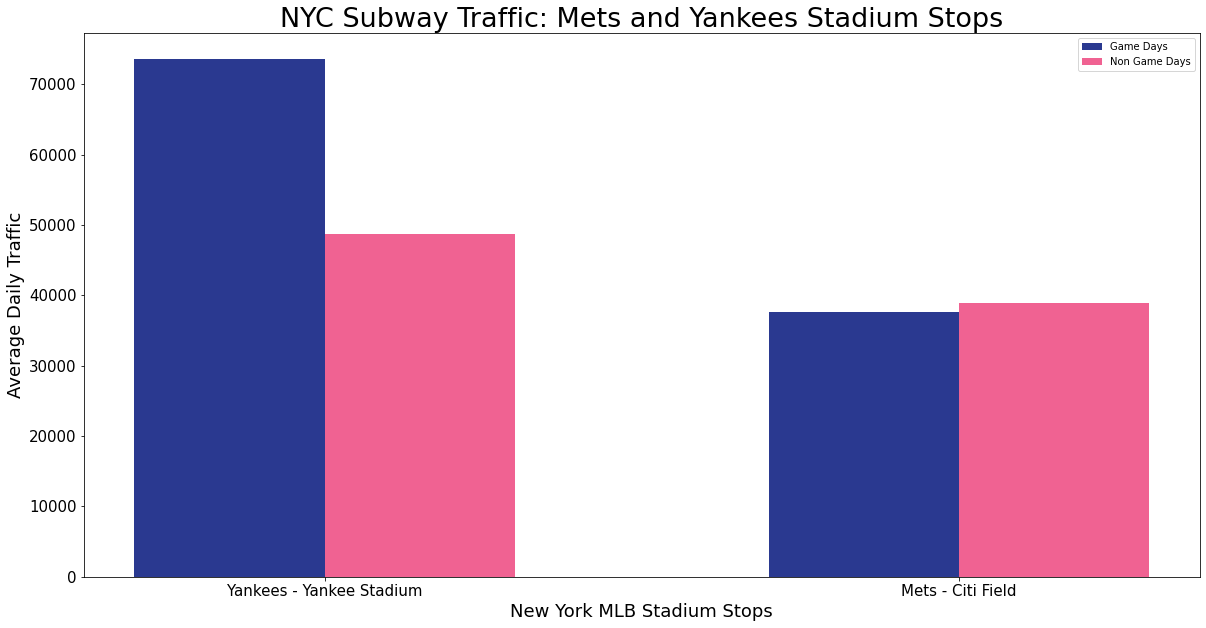

In [78]:
plt.bar(ind, game_days, width, label='Game Days', color = '#2a3990')
plt.bar(ind + width, non_game_days, width, label='Non Game Days', color = '#f06292')
plt.xlabel('New York MLB Stadium Stops', size = 18)
plt.ylabel('Average Daily Traffic', size = 18)
plt.title('NYC Subway Traffic: Mets and Yankees Stadium Stops', size=27)
plt.legend()
plt.xticks(ind + width / 2, ('Yankees - Yankee Stadium', 'Mets - Citi Field'), size=15)
plt.yticks(size=15)
plt.rcParams.update({'font.size': 11})
plt.savefig('nyc_mlb_traffic.jpg');

### NBA Schedule

Target: find gameday vs. non-gameday for knicks/nets

In [79]:
nba_schedule_2019 = pd.read_csv('nba-2018-UTC-08.csv')

In [80]:
nba_schedule_2019.head()

,Round Number,Date,Location,Home Team,Away Team,Result
0,1,16/10/2018 16:00,TD Garden,Boston Celtics,Philadelphia 76ers,NaN
1,1,16/10/2018 18:30,ORACLE Arena,Golden State Warriors,Oklahoma City Thunder,NaN
2,1,17/10/2018 15:00,Spectrum Center,Charlotte Hornets,Milwaukee Bucks,NaN
3,1,17/10/2018 15:00,Little Caesars Arena,Detroit Pistons,Brooklyn Nets,NaN
4,1,17/10/2018 15:00,Bankers Life Fieldhouse,Indiana Pacers,Memphis Grizzlies,NaN


In [81]:
knicks_home_games = nba_schedule_2019[nba_schedule_2019['Home Team'] == 'New York Knicks']
knicks_home_games['Date_Time'] = pd.to_datetime(knicks_home_games['Date'], dayfirst=True)
knicks_home_games['DateTime'] = knicks_home_games['Date_Time'].dt.date
knicks_home_games['DateTime'] = pd.to_datetime(knicks_home_games['DateTime'])
knicks_home_games.sort_values(['Date_Time']).tail(15)

<ipython-input-81-e409209f8ce1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knicks_home_games['Date_Time'] = pd.to_datetime(knicks_home_games['Date'], dayfirst=True)
<ipython-input-81-e409209f8ce1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knicks_home_games['DateTime'] = knicks_home_games['Date_Time'].dt.date
<ipython-input-81-e409209f8ce1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,Round Number,Date,Location,Home Team,Away Team,Result,Date_Time,DateTime
855,17,13/02/2019 16:30,Madison Square Garden,New York Knicks,Philadelphia 76ers,NaN,2019-02-13 16:30:00,2019-02-13
877,18,22/02/2019 16:30,Madison Square Garden,New York Knicks,Minnesota Timberwolves,NaN,2019-02-22 16:30:00,2019-02-22
895,18,24/02/2019 16:30,Madison Square Garden,New York Knicks,San Antonio Spurs,NaN,2019-02-24 16:30:00,2019-02-24
907,18,26/02/2019 16:30,Madison Square Garden,New York Knicks,Orlando Magic,NaN,2019-02-26 16:30:00,2019-02-26
923,19,28/02/2019 16:30,Madison Square Garden,New York Knicks,Cleveland Cavaliers,NaN,2019-02-28 16:30:00,2019-02-28
985,20,09/03/2019 09:00,Madison Square Garden,New York Knicks,Sacramento Kings,NaN,2019-03-09 09:00:00,2019-03-09
1041,21,17/03/2019 08:00,Madison Square Garden,New York Knicks,Los Angeles Lakers,NaN,2019-03-17 08:00:00,2019-03-17
1067,21,20/03/2019 15:30,Madison Square Garden,New York Knicks,Utah Jazz,NaN,2019-03-20 15:30:00,2019-03-20
1081,22,22/03/2019 15:30,Madison Square Garden,New York Knicks,Denver Nuggets,NaN,2019-03-22 15:30:00,2019-03-22
1094,22,24/03/2019 08:00,Madison Square Garden,New York Knicks,LA Clippers,NaN,2019-03-24 08:00:00,2019-03-24


In [82]:
nets_home_games = nba_schedule_2019[nba_schedule_2019['Home Team'] == 'Brooklyn Nets']
nets_home_games['Date_Time'] = pd.to_datetime(nets_home_games['Date'], dayfirst=True)
nets_home_games['DateTime'] = nets_home_games['Date_Time'].dt.date
nets_home_games['DateTime'] = pd.to_datetime(nets_home_games['DateTime'])
nets_home_games.tail(15)

<ipython-input-82-f15d5bcb479e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nets_home_games['Date_Time'] = pd.to_datetime(nets_home_games['Date'], dayfirst=True)
<ipython-input-82-f15d5bcb479e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nets_home_games['DateTime'] = nets_home_games['Date_Time'].dt.date
<ipython-input-82-f15d5bcb479e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,Round Number,Date,Location,Home Team,Away Team,Result,Date_Time,DateTime
751,15,29/01/2019 16:30,Barclays Center,Brooklyn Nets,Chicago Bulls,NaN,2019-01-29 16:30:00,2019-01-29
791,16,04/02/2019 16:30,Barclays Center,Brooklyn Nets,Milwaukee Bucks,NaN,2019-02-04 16:30:00,2019-02-04
803,16,06/02/2019 16:30,Barclays Center,Brooklyn Nets,Denver Nuggets,NaN,2019-02-06 16:30:00,2019-02-06
819,17,08/02/2019 16:30,Barclays Center,Brooklyn Nets,Chicago Bulls,NaN,2019-02-08 16:30:00,2019-02-08
868,18,21/02/2019 16:30,Barclays Center,Brooklyn Nets,Portland Trail Blazers,NaN,2019-02-21 16:30:00,2019-02-21
899,18,25/02/2019 16:30,Barclays Center,Brooklyn Nets,San Antonio Spurs,NaN,2019-02-25 16:30:00,2019-02-25
913,18,27/02/2019 16:30,Barclays Center,Brooklyn Nets,Washington Wizards,NaN,2019-02-27 16:30:00,2019-02-27
928,19,01/03/2019 16:30,Barclays Center,Brooklyn Nets,Charlotte Hornets,NaN,2019-03-01 16:30:00,2019-03-01
951,19,04/03/2019 16:30,Barclays Center,Brooklyn Nets,Dallas Mavericks,NaN,2019-03-04 16:30:00,2019-03-04
968,19,06/03/2019 16:30,Barclays Center,Brooklyn Nets,Cleveland Cavaliers,NaN,2019-03-06 16:30:00,2019-03-06


In [83]:
#Dropping columns that are not needed for merging the files
knicks_home_games.drop(columns = ['Date', 'Round Number','Away Team','Result', 'Date_Time'], inplace=True)
nets_home_games.drop(columns = ['Date', 'Round Number','Away Team','Result', 'Date_Time'], inplace=True)

/Users/patrickbovard/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Madison Square Garden Stops: 34TH ST-HERALD SQ, 34 ST-PENN STA  
Barclays Center Stops: ATL AV-BARCLAY, FULTON ST, LAFAYETTE AV
 
    

Making a mask for the KNicks and Nets Stadium Stops:

In [84]:
msg_mask = ((grouped_time.STATION == '34 ST-HERALD SQ') | (grouped_time.STATION == '34 ST-PENN STA'))
barclays_mask = ((grouped_time.STATION == 'ATL AV-BARCLAY') | (grouped_time.STATION == 'FULTON ST') | (grouped_time.STATION == 'LAFAYETTE AV'))

In [85]:
grouped_time[barclays_mask].STATION.value_counts()

FULTON ST         44315
ATL AV-BARCLAY    22153
LAFAYETTE AV       4555
Name: STATION, dtype: int64

In [86]:
grouped_time[msg_mask].STATION.value_counts()

34 ST-PENN STA     45790
34 ST-HERALD SQ    24755
Name: STATION, dtype: int64

### Creating a dataframe for knicks games only:

In [87]:
knicks_df = grouped_time[msg_mask]
knicks_df.head()

,STATION,DIVISION,DATE,TIME,DESC,Date_Time,Turnstile,Week_Day,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC
2951,34 ST-HERALD SQ,BMT,2019-05-11,04:00:00,REGULAR,2019-05-11 04:00:00,A022R02201-00-0034 ST-HERALD SQ,Saturday,209.0,45.0,254.0
2952,34 ST-HERALD SQ,BMT,2019-05-11,08:00:00,REGULAR,2019-05-11 08:00:00,A022R02201-00-0034 ST-HERALD SQ,Saturday,80.0,78.0,158.0
2953,34 ST-HERALD SQ,BMT,2019-05-11,12:00:00,REGULAR,2019-05-11 12:00:00,A022R02201-00-0034 ST-HERALD SQ,Saturday,443.0,364.0,807.0
2954,34 ST-HERALD SQ,BMT,2019-05-11,16:00:00,REGULAR,2019-05-11 16:00:00,A022R02201-00-0034 ST-HERALD SQ,Saturday,929.0,711.0,1640.0
2955,34 ST-HERALD SQ,BMT,2019-05-11,20:00:00,REGULAR,2019-05-11 20:00:00,A022R02201-00-0034 ST-HERALD SQ,Saturday,1120.0,626.0,1746.0


Converting the date to datetime to match with teh schedule data:

In [88]:
knicks_df['DateTime'] = pd.to_datetime(knicks_df['DATE'], cache=True)

<ipython-input-88-a92c4ca7619e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knicks_df['DateTime'] = pd.to_datetime(knicks_df['DATE'], cache=True)


In [89]:
knicks_df.head()

,STATION,DIVISION,DATE,TIME,DESC,Date_Time,Turnstile,Week_Day,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC,DateTime
2951,34 ST-HERALD SQ,BMT,2019-05-11,04:00:00,REGULAR,2019-05-11 04:00:00,A022R02201-00-0034 ST-HERALD SQ,Saturday,209.0,45.0,254.0,2019-05-11
2952,34 ST-HERALD SQ,BMT,2019-05-11,08:00:00,REGULAR,2019-05-11 08:00:00,A022R02201-00-0034 ST-HERALD SQ,Saturday,80.0,78.0,158.0,2019-05-11
2953,34 ST-HERALD SQ,BMT,2019-05-11,12:00:00,REGULAR,2019-05-11 12:00:00,A022R02201-00-0034 ST-HERALD SQ,Saturday,443.0,364.0,807.0,2019-05-11
2954,34 ST-HERALD SQ,BMT,2019-05-11,16:00:00,REGULAR,2019-05-11 16:00:00,A022R02201-00-0034 ST-HERALD SQ,Saturday,929.0,711.0,1640.0,2019-05-11
2955,34 ST-HERALD SQ,BMT,2019-05-11,20:00:00,REGULAR,2019-05-11 20:00:00,A022R02201-00-0034 ST-HERALD SQ,Saturday,1120.0,626.0,1746.0,2019-05-11


Joining the knicks game schedule with subway data:

In [90]:
knicks_home_games.head()

,Location,Home Team,DateTime
6,Madison Square Garden,New York Knicks,2018-10-17
27,Madison Square Garden,New York Knicks,2018-10-20
67,Madison Square Garden,New York Knicks,2018-10-26
89,Madison Square Garden,New York Knicks,2018-10-29
104,Madison Square Garden,New York Knicks,2018-10-31


In [91]:
joined_knicks_df = knicks_df.merge(knicks_home_games, how='left', on='DateTime')
joined_knicks_df.sample(10)

,STATION,DIVISION,DATE,TIME,DESC,Date_Time,Turnstile,Week_Day,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC,DateTime,Location,Home Team
33948,34 ST-PENN STA,IND,2019-05-26,12:00:00,REGULAR,2019-05-26 12:00:00,N071R01300-00-0334 ST-PENN STA,Sunday,153.0,136.0,289.0,2019-05-26,NaN,NaN
48460,34 ST-HERALD SQ,IND,2019-04-01,00:00:00,REGULAR,2019-04-01 00:00:00,N506R02200-05-0034 ST-HERALD SQ,Monday,89.0,74.0,163.0,2019-04-01,Madison Square Garden,New York Knicks
46447,34 ST-PENN STA,IND,2019-04-02,08:00:00,REGULAR,2019-04-02 08:00:00,N070R01204-00-0434 ST-PENN STA,Tuesday,87.0,165.0,252.0,2019-04-02,NaN,NaN
2712,34 ST-PENN STA,IND,2019-05-14,16:00:00,REGULAR,2019-05-14 16:00:00,N073R01302-00-0334 ST-PENN STA,Tuesday,144.0,454.0,598.0,2019-05-14,NaN,NaN
13695,34 ST-PENN STA,IND,2019-04-13,00:00:00,REGULAR,2019-04-13 00:00:00,N067R01200-00-0034 ST-PENN STA,Saturday,0.0,0.0,0.0,2019-04-13,NaN,NaN
70152,34 ST-PENN STA,IRT,2019-04-29,16:00:00,REGULAR,2019-04-29 16:00:00,R141R03100-03-0234 ST-PENN STA,Monday,212.0,95.0,307.0,2019-04-29,NaN,NaN
24173,34 ST-PENN STA,IRT,2019-06-06,06:00:00,REGULAR,2019-06-06 06:00:00,R138R29300-00-0034 ST-PENN STA,Thursday,5.0,46.0,51.0,2019-06-06,NaN,NaN
59845,34 ST-PENN STA,IND,2019-05-09,16:00:00,REGULAR,2019-05-09 16:00:00,N072R01205-00-0034 ST-PENN STA,Thursday,35.0,257.0,292.0,2019-05-09,NaN,NaN
25407,34 ST-PENN STA,IRT,2019-06-03,22:00:00,REGULAR,2019-06-03 22:00:00,R142R29301-00-0034 ST-PENN STA,Monday,553.0,132.0,685.0,2019-06-03,NaN,NaN
48931,34 ST-HERALD SQ,IND,2019-04-03,00:00:00,REGULAR,2019-04-03 00:00:00,N507R02300-00-0334 ST-HERALD SQ,Wednesday,21.0,96.0,117.0,2019-04-03,NaN,NaN


Filling na's with "NoGame" for easier filtering:

In [92]:
joined_knicks_df['Home Team'].fillna('NoGame', inplace=True)

Adding masks for games/nongamedays for the Knicks:

In [93]:
knicks_game_mask = (joined_knicks_df['Home Team'] == 'New York Knicks')
non_knicks_game_mask = (joined_knicks_df['Home Team'] == 'NoGame')

In [94]:
joined_knicks_df[knicks_game_mask]

,STATION,DIVISION,DATE,TIME,DESC,Date_Time,Turnstile,Week_Day,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC,DateTime,Location,Home Team
44710,34 ST-HERALD SQ,BMT,2019-03-30,00:00:00,REGULAR,2019-03-30 00:00:00,A022R02201-00-0034 ST-HERALD SQ,Saturday,0.0,0.0,0.0,2019-03-30,Madison Square Garden,New York Knicks
44711,34 ST-HERALD SQ,BMT,2019-03-30,04:00:00,REGULAR,2019-03-30 04:00:00,A022R02201-00-0034 ST-HERALD SQ,Saturday,188.0,40.0,228.0,2019-03-30,Madison Square Garden,New York Knicks
44712,34 ST-HERALD SQ,BMT,2019-03-30,08:00:00,REGULAR,2019-03-30 08:00:00,A022R02201-00-0034 ST-HERALD SQ,Saturday,65.0,67.0,132.0,2019-03-30,Madison Square Garden,New York Knicks
44713,34 ST-HERALD SQ,BMT,2019-03-30,12:00:00,REGULAR,2019-03-30 12:00:00,A022R02201-00-0034 ST-HERALD SQ,Saturday,335.0,457.0,792.0,2019-03-30,Madison Square Garden,New York Knicks
44714,34 ST-HERALD SQ,BMT,2019-03-30,16:00:00,REGULAR,2019-03-30 16:00:00,A022R02201-00-0034 ST-HERALD SQ,Saturday,891.0,696.0,1587.0,2019-03-30,Madison Square Garden,New York Knicks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57623,34 ST-PENN STA,IRT,2019-04-10,06:00:00,REGULAR,2019-04-10 06:00:00,R142R29301-06-0134 ST-PENN STA,Wednesday,3.0,15.0,18.0,2019-04-10,Madison Square Garden,New York Knicks
57624,34 ST-PENN STA,IRT,2019-04-10,10:00:00,REGULAR,2019-04-10 10:00:00,R142R29301-06-0134 ST-PENN STA,Wednesday,109.0,508.0,617.0,2019-04-10,Madison Square Garden,New York Knicks
57625,34 ST-PENN STA,IRT,2019-04-10,14:00:00,REGULAR,2019-04-10 14:00:00,R142R29301-06-0134 ST-PENN STA,Wednesday,122.0,316.0,438.0,2019-04-10,Madison Square Garden,New York Knicks
57626,34 ST-PENN STA,IRT,2019-04-10,18:00:00,REGULAR,2019-04-10 18:00:00,R142R29301-06-0134 ST-PENN STA,Wednesday,260.0,306.0,566.0,2019-04-10,Madison Square Garden,New York Knicks


In [95]:
#Avg. Knicks Gameday Traffic:
knicks_gameday_df = joined_knicks_df[knicks_game_mask].groupby(['DateTime'], as_index=False).TOTAL_TRAFFIC.sum()
knicks_gameday_df

,DateTime,TOTAL_TRAFFIC
0,2019-03-30,439474.0
1,2019-04-01,545645.0
2,2019-04-07,288439.0
3,2019-04-10,579471.0


In [96]:
knicks_gameday_traffic = knicks_gameday_df['TOTAL_TRAFFIC'].mean()
knicks_gameday_traffic

463257.25

In [97]:
#Avg. Knicks Non-Gameday Traffic:
knicks_non_gameday_df = joined_knicks_df[non_knicks_game_mask].groupby(['DateTime'], as_index=False).TOTAL_TRAFFIC.sum()
knicks_non_gameday_df

,DateTime,TOTAL_TRAFFIC
0,2019-03-31,271738.0
1,2019-04-02,568251.0
2,2019-04-03,576781.0
3,2019-04-04,582824.0
4,2019-04-05,587155.0
...,...,...
68,2019-06-10,547329.0
69,2019-06-11,563709.0
70,2019-06-12,614334.0
71,2019-06-13,593877.0


In [98]:
knicks_non_gameday_traffic = knicks_non_gameday_df['TOTAL_TRAFFIC'].mean()
knicks_non_gameday_traffic

522824.30136986304

In [99]:
#Percent Difference:
knicks_diff = knicks_gameday_traffic-knicks_non_gameday_traffic
knicks_percent = (knicks_gameday_traffic-knicks_non_gameday_traffic)/knicks_non_gameday_traffic * 100
print("Total difference between GameDay and Non-GameDay Traffic for New York Knicks: {}".format(knicks_diff))
print("Percent difference between GameDay and Non-GameDay Traffic for New York Knicks: {}%".format(knicks_percent))

Total difference between GameDay and Non-GameDay Traffic for New York Knicks: -59567.05136986304
Percent difference between GameDay and Non-GameDay Traffic for New York Knicks: -11.393321085838998%


### Repeating above, but for Nets:

In [100]:
nets_df = grouped_time[barclays_mask]
nets_df.head()
#nets_df.Date.value_counts()

,STATION,DIVISION,DATE,TIME,DESC,Date_Time,Turnstile,Week_Day,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC
12643,FULTON ST,BMT,2019-05-11,07:00:00,REGULAR,2019-05-11 07:00:00,A077R02803-00-00FULTON ST,Saturday,11.0,1.0,12.0
12644,FULTON ST,BMT,2019-05-11,11:00:00,REGULAR,2019-05-11 11:00:00,A077R02803-00-00FULTON ST,Saturday,38.0,28.0,66.0
12645,FULTON ST,BMT,2019-05-11,15:00:00,REGULAR,2019-05-11 15:00:00,A077R02803-00-00FULTON ST,Saturday,101.0,28.0,129.0
12646,FULTON ST,BMT,2019-05-11,19:00:00,REGULAR,2019-05-11 19:00:00,A077R02803-00-00FULTON ST,Saturday,166.0,49.0,215.0
12647,FULTON ST,BMT,2019-05-11,23:00:00,REGULAR,2019-05-11 23:00:00,A077R02803-00-00FULTON ST,Saturday,77.0,26.0,103.0


In [101]:
nets_df['DateTime'] = pd.to_datetime(nets_df['DATE'], cache=True)

<ipython-input-101-f3b98e81cec6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nets_df['DateTime'] = pd.to_datetime(nets_df['DATE'], cache=True)


Joining the nets game schedule with subway data:

In [102]:
nets_home_games.head()
nets_home_games.DateTime.value_counts()

2019-01-21    1
2018-11-23    1
2019-01-23    1
2018-11-04    1
2018-12-05    1
2018-12-14    1
2019-01-09    1
2018-10-28    1
2018-11-28    1
2019-01-29    1
2019-03-01    1
2019-02-04    1
2019-01-25    1
2018-12-16    1
2018-12-26    1
2018-11-02    1
2018-12-03    1
2019-03-06    1
2018-11-14    1
2019-02-08    1
2018-12-18    1
2019-02-21    1
2018-11-17    1
2019-01-02    1
2018-12-23    1
2019-04-01    1
2018-10-19    1
2019-01-14    1
2018-11-25    1
2018-10-31    1
2018-12-07    1
2019-03-30    1
2019-03-04    1
2019-04-03    1
2019-04-10    1
2019-02-27    1
2018-11-30    1
2019-02-25    1
2019-03-11    1
2019-02-06    1
2018-12-21    1
Name: DateTime, dtype: int64

In [103]:
joined_nets_df = nets_df.merge(nets_home_games, how='left', on='DateTime')
joined_nets_df.DATE.value_counts()

2019-05-15    1120
2019-05-16    1106
2019-05-17    1093
2019-05-21    1076
2019-06-03    1076
              ... 
2019-06-01     828
2019-04-20     811
2019-03-30     810
2019-05-11     760
2019-04-13     754
Name: DATE, Length: 77, dtype: int64

Filling na's with "NoGame" for easier filtering:

In [104]:
joined_nets_df['Home Team'].fillna('NoGame', inplace=True)

Adding masks for games/nongamedays for the nets:

In [105]:
nets_game_mask = (joined_nets_df['Home Team'] == 'Brooklyn Nets')
non_nets_game_mask = (joined_nets_df['Home Team'] == 'NoGame')

In [106]:
#Avg. Nets Gameday Traffic: first, finding total traffic on each gameday:
nets_gameday_df = joined_nets_df[nets_game_mask].groupby(['DateTime'], as_index = False).TOTAL_TRAFFIC.sum()
nets_gameday_df

,DateTime,TOTAL_TRAFFIC
0,2019-03-30,464780.0
1,2019-04-01,277963.0
2,2019-04-03,296186.0
3,2019-04-10,286300.0


In [107]:
#Averaging total traffic on each game day: 
nets_gameday_traffic = nets_gameday_df.TOTAL_TRAFFIC.mean()
nets_gameday_traffic

331307.25

In [108]:
#Avg. Nets Non-Gameday Traffic: first, finding total traffic on each non-gameday:
nets_non_gameday_df = joined_nets_df[non_nets_game_mask].groupby(['DateTime'], as_index=False).TOTAL_TRAFFIC.sum()
nets_non_gameday_df

,DateTime,TOTAL_TRAFFIC
0,2019-03-31,104384.0
1,2019-04-02,291959.0
2,2019-04-04,300436.0
3,2019-04-05,291956.0
4,2019-04-06,155659.0
...,...,...
68,2019-06-10,267391.0
69,2019-06-11,279849.0
70,2019-06-12,297730.0
71,2019-06-13,294373.0


In [109]:
#Averaging total traffic on each game day:
nets_non_gameday_traffic = nets_non_gameday_df.TOTAL_TRAFFIC.mean()
nets_non_gameday_traffic

298290.7534246575

In [110]:
#Percent Difference:
nets_diff = (nets_gameday_traffic - nets_non_gameday_traffic)
nets_percent = (nets_gameday_traffic - nets_non_gameday_traffic) / nets_non_gameday_traffic * 100
print("Total difference between GameDay and Non-GameDay Traffic for Brooklyn Nets: {}".format(nets_diff))
print("Percent difference between GameDay and Non-GameDay Traffic for Brooklyn Nets: {}%".format(nets_percent))

Total difference between GameDay and Non-GameDay Traffic for Brooklyn Nets: 33016.49657534249
Percent difference between GameDay and Non-GameDay Traffic for Brooklyn Nets: 11.068561863310263%


Plotting as a bar chart:

In [111]:
nba_game_days = (knicks_gameday_traffic, nets_gameday_traffic) 
non_nba_game_days = (knicks_non_gameday_traffic, nets_non_gameday_traffic)

In [112]:
N = 2
ind = np.arange(N)
width = 0.3

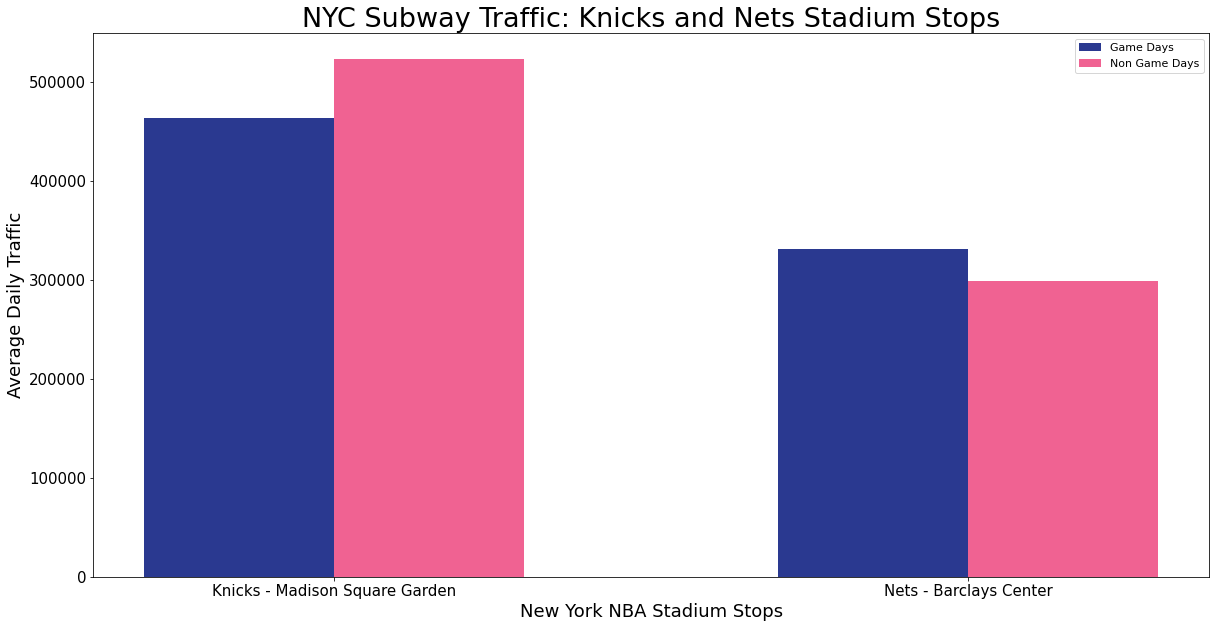

In [113]:
plt.bar(ind, nba_game_days, width, label='Game Days', color = '#2a3990')
plt.bar(ind + width, non_nba_game_days, width, label='Non Game Days', color = '#f06292')
plt.xlabel('New York NBA Stadium Stops', fontsize=18)
plt.ylabel('Average Daily Traffic', fontsize=18)
plt.title('NYC Subway Traffic: Knicks and Nets Stadium Stops', fontsize=27)
plt.legend()
plt.xticks(ind + width / 2, ('Knicks - Madison Square Garden', 'Nets - Barclays Center'), fontsize=15)
plt.yticks(fontsize=15)
plt.rcParams.update({'font.size': 11})
plt.savefig('nyc_nba_traffic.jpg');